In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from loguru import logger
import warnings
import tomllib

warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
# load parq file
configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

root = Path("..").resolve()
processed = root / Path(config["processed"])
datafile = processed / config["current"]
if not datafile.exists():
    logger.warning(
        f"{datafile} does not exist. First run src/preprocess.py, and check the timestamp!"
    )

df = pd.read_parquet(datafile)

In [5]:
# Voeg een kolom toe die het aantal vraagtekens in elk bericht telt
df["questions"] = df["message"].apply(lambda x: str(x).count("?"))

# Groepeer per gebruiker en tel het aantal vraagtekens
vraag_count = df.groupby("author")["questions"].sum().reset_index()

# Sorteer op de meeste gestelde vragen
vraag_count = vraag_count.sort_values(by="questions", ascending=False)

# Verwijder gebruikers die 0 vragen hebben gesteld
vraag_count = vraag_count[vraag_count["questions"] > 0]

vraag_count

,author,questions
0,blithe-chinchilla,6
18,laughing-cat,5
4,delightful-lapwing,5
15,joking-starling,4
31,snickering-dove,3
29,riotous-platypus,3
7,freckled-serval,2
30,roguish-monkey,1
34,spotted-finch,1
9,frothy-pheasant,1


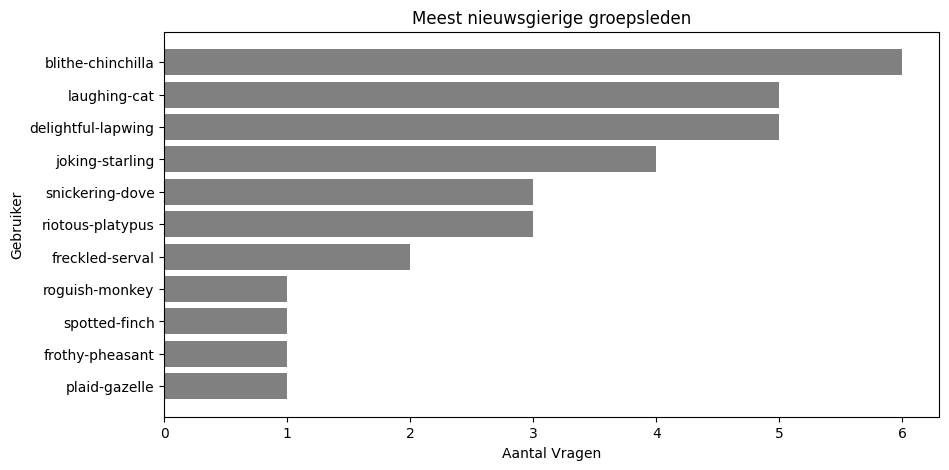

In [6]:
# Maak een staafdiagram van de gebruikers die de meeste vragen stellen
plt.figure(figsize=(10, 5))
plt.barh(vraag_count["author"], vraag_count["questions"], color='grey') # Begin met grijs
plt.xlabel("Aantal Vragen")
plt.ylabel("Gebruiker")
plt.title("Meest nieuwsgierige groepsleden")
plt.gca().invert_yaxis()  # Zodat de gebruiker met de meeste vragen bovenaan staat

# Toon de grafiek
# plt.show()

import os

# Zorg ervoor dat de 'img' map bestaat
if not os.path.exists('../img'):
    os.makedirs('../img')

# Opslaan van de figuur als een afbeelding in de 'img' map
plt.savefig("../img/aantal_gestelde_vragen_per_gebruiker.jpg")